In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


data = pd.read_csv('AirPassengers.csv')
data.head(2)

data.info()

data['Month'] = pd.to_datetime(data.Month)
data.head()

data.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
Month          144 non-null object
#Passengers    144 non-null int64
dtypes: int64(1), object(1)
memory usage: 2.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
Month          144 non-null datetime64[ns]
#Passengers    144 non-null int64
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [2]:

# We have 12 years of data. 
# We will keep 11 years data as training
# 1 year data (12 months) as testing

train = data.loc[:len(data)-12, :]
test = data.loc[ len(data)-12:, :]


C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'No of air passengers')

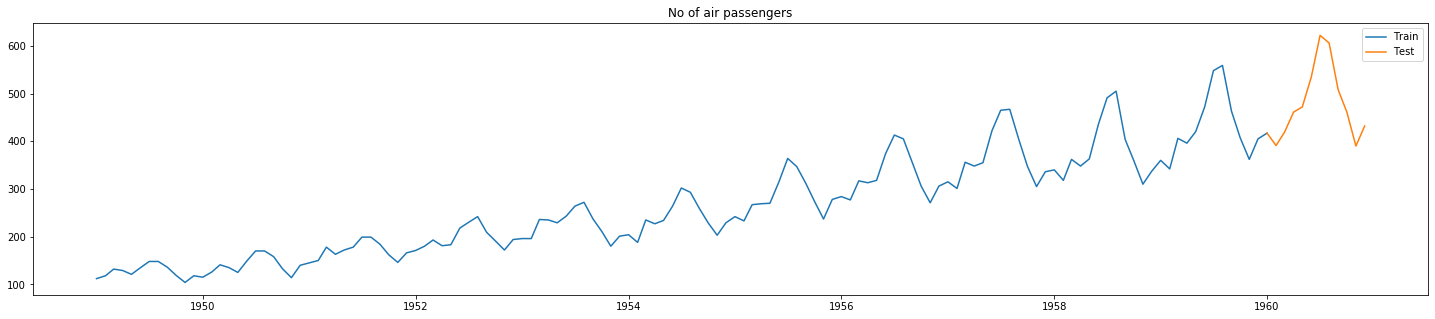

In [3]:

fig, ax = plt.subplots(figsize=(25, 5))
ax.plot('Month', '#Passengers', data=train, label='Train')
ax.plot('Month', '#Passengers', data=test, label='Test')
ax.legend()
ax.set_title('No of air passengers')

In [4]:
pwd

'C:\\Users\\Hp\\Downloads'